In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [30]:
print("Training shape: ", X_train.shape)
print("Testing shape: ", X_test.shape)


Training shape:  (60000, 28, 28)
Testing shape:  (10000, 28, 28)


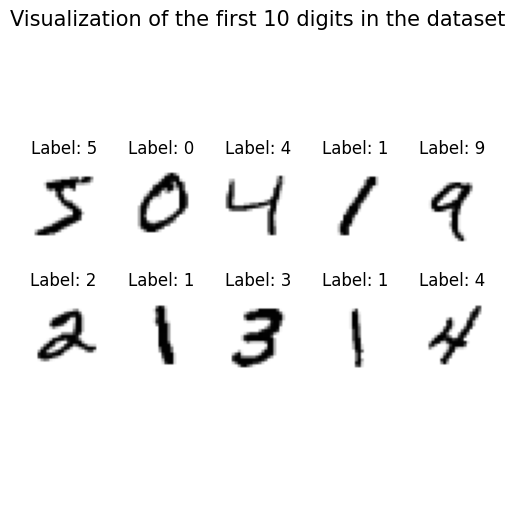

In [24]:
plt.figure(figsize = (5,5))
plt.title("Visualization of the first 10 digits in the dataset",fontsize = 15)
plt.axis('off')
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i], cmap='binary')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
  plt.tight_layout(h_pad = -1)

In [63]:
# normalizing the data
X_train_normalized = X_train/255
X_test_normalized = X_test/255

# adding a channel
X_train_normalized = X_train_normalized.reshape(-1,28,28,1)
X_test_normalized = X_test_normalized.reshape(-1,28,28,1)

# encoding the labels into one hot vectors
y_train_encoded = to_categorical(y_train,num_classes=10)
y_test_encoded = to_categorical(y_test,num_classes=10)

In [43]:
print("Range of the original dataset")
print(X_train.min(), X_train.max())
print("\n")

print("Range of the normalized dataset")
print(X_train_normalized.min(), X_train_normalized.max())
print("\n")

print("Encoded labels")
y_train_encoded


Range of the original dataset
0 255


Range of the normalized dataset
0.0 1.0


Encoded labels


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [55]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2),padding = "valid", strides = 2))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding = "valid", strides = 2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))   # After dense layers

model.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
history = model.fit(X_train_normalized,y_train_encoded,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8104 - loss: 0.5879 - val_accuracy: 0.9795 - val_loss: 0.0678
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9631 - loss: 0.1215 - val_accuracy: 0.9840 - val_loss: 0.0520
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0875 - val_accuracy: 0.9868 - val_loss: 0.0420
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9783 - loss: 0.0691 - val_accuracy: 0.9885 - val_loss: 0.0409
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9814 - loss: 0.0634 - val_accuracy: 0.9900 - val_loss: 0.0376
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0560 - val_accuracy: 0.9902 - val_loss: 0.0358
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.9916 - val_loss: 0.0334
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9860 - loss: 0.0458 - 

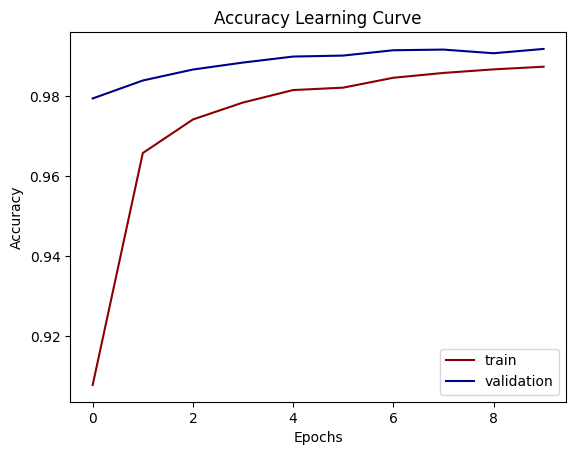

In [59]:
plt.plot(history.history['accuracy'],color = 'darkred',label = 'train')
plt.plot(history.history['val_accuracy'], color = 'darkblue',label = 'validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Learning Curve")
plt.show()

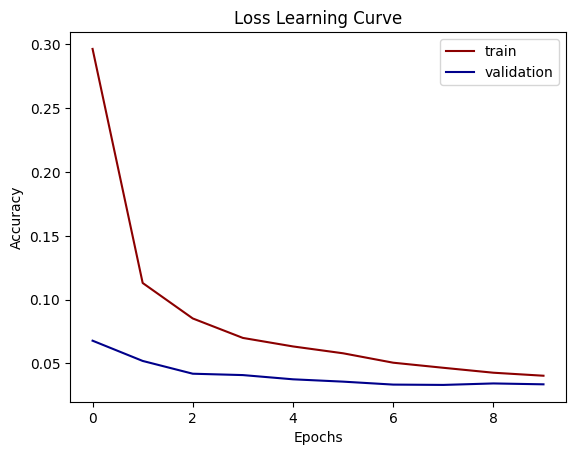

In [60]:
plt.plot(history.history['loss'],color = 'darkred',label = 'train')
plt.plot(history.history['val_loss'], color = 'darkblue',label = 'validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Loss Learning Curve")
plt.show()

In [64]:
model.evaluate(X_test_normalized,y_test_encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0341


[0.026619989424943924, 0.9912999868392944]

In [68]:
predictions = model.predict(X_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


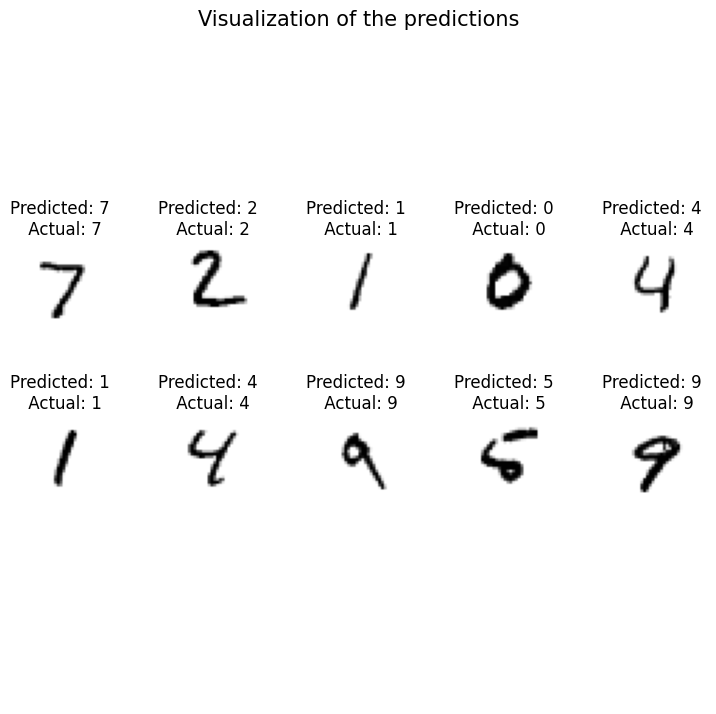

In [71]:
plt.figure(figsize = (7,7))
plt.title("Visualization of the predictions",fontsize = 15)
plt.axis('off')

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i], cmap='binary')
  plt.title(f"Predicted: {np.argmax(predictions[i])} \n Actual: {y_test[i]}")
  plt.axis('off')
  plt.tight_layout(h_pad = -1, w_pad = 5)


In [73]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [74]:
model.save('/content/drive/MyDrive/mnist_cnn_model.h5')